# Imports

In [1]:
from Skipass.utils.df_typing import mf_date_conv_filtered
from Skipass.station_filter.station_filter import station_filter_nivo,station_filter_synop, station_mapping 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path_to_nivo = '../raw_data/weather_nivo_data.csv'
path_to_synop = '../raw_data/weather_synop_data.csv'
year = 2018
from Skipass.utils.DataCleaner import replace_values,delete_bad_measures,select_stations
import numpy as np

# JOUR 1

In [24]:
df_nivo = df_nivo[df_nivo.numer_sta != 'numer_sta']
df_nivo.numer_sta = df_nivo.numer_sta.astype(int)

## DF creation

In [4]:
df_nivo = pd.read_csv(path_to_nivo);
df_synop = pd.read_csv(path_to_synop);

## Exploration

In [33]:
stations.ID = stations.ID.astype(int)
print(stations.info())
df_nivo['numer_sta'].isin(stations.ID)
df_nivo = df_nivo[df_nivo.numer_sta.isin(stations.ID)]
df_synop = df_synop[df_synop.numer_sta.isin(stations.ID)]
df_nivo_year = mf_date_conv_filtered(df_nivo,year)
df_synop_year = mf_date_conv_filtered(df_synop,year)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1 to 30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   73 non-null     float64
 1   Longitude  73 non-null     float64
 2   ID         73 non-null     int64  
 3   Altitude   73 non-null     int64  
 4   Nom        73 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 3.4+ KB
None


<AxesSubplot:title={'center':'Synop data 2018 - 1 stations'}, xlabel='date', ylabel='Count'>

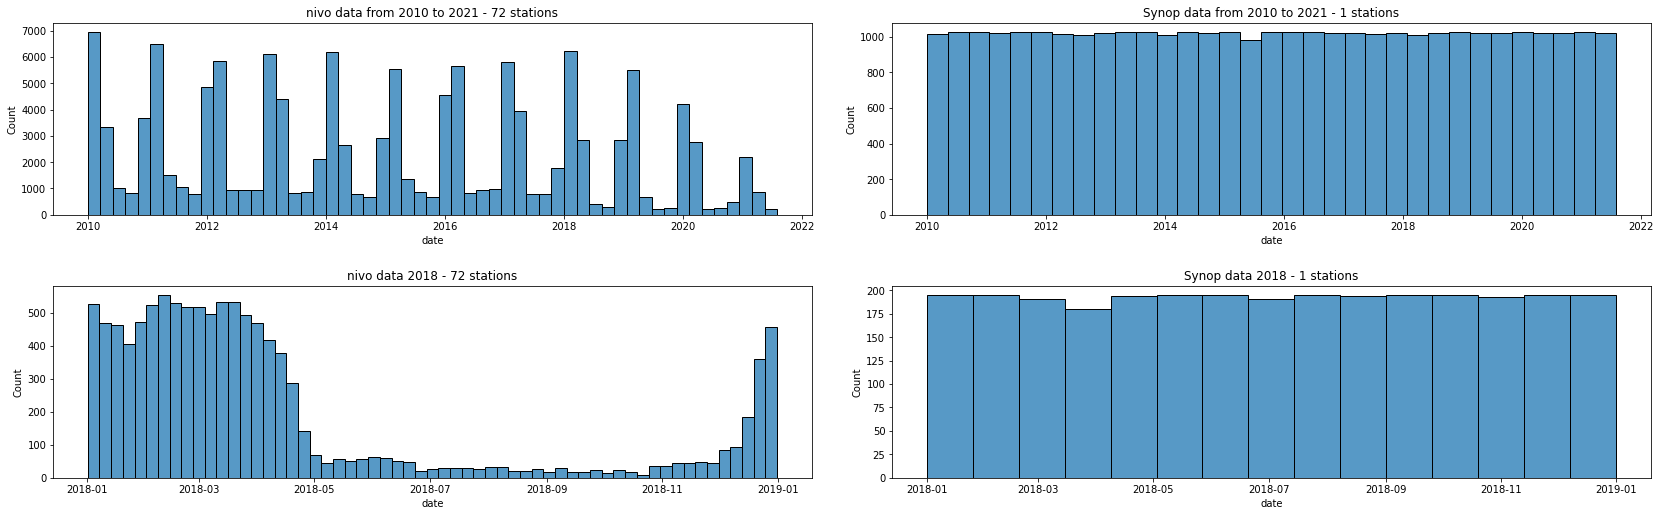

In [34]:
fig, axs2 = plt.subplots(2,2, figsize=(24,8))
fig.tight_layout(pad=5.0)
axs2[0,0].set_title('nivo data from 2010 to 2021 - 72 stations')
sns.histplot(data=df_nivo.date, ax=axs2[0,0])
axs2[1,0].set_title('nivo data 2018 - 72 stations')
sns.histplot(data=df_nivo_year.date, ax=axs2[1,0])
axs2[0,1].set_title('Synop data from 2010 to 2021 - 1 stations')
sns.histplot(data=df_synop.date, ax=axs2[0,1])
axs2[1,1].set_title('Synop data 2018 - 1 stations')
sns.histplot(data=df_synop_year.date, ax=axs2[1,1])

In [36]:
nivo_top10 = df_nivo.groupby('numer_sta',as_index=False).count().nlargest(10,'t')[['numer_sta','t','td']]
nivo_top10 = nivo_top10.rename(columns={'numer_sta':'ID'})
nivo_top10 = nivo_top10.merge(stations,how='left',on='ID').drop(columns=('td')).rename(columns={'t':'line_count'})
nivo_top10

,ID,line_count,Latitude,Longitude,Altitude,Nom
0,7590,6537,44.810000,6.195333,1270,Les Portes en Valgaudemar
1,7931,5812,44.671167,6.776167,1665,CEILLAC_NIVO
2,7457,5113,46.315333,6.673333,790,VACHERESSE AUXI
3,7893,4379,45.413333,6.632167,1780,Courchevel
4,7876,4264,45.972000,6.454167,1270,Le Grand Bornand
5,7589,3464,44.946667,6.188333,1570,St Christophe
6,7933,3428,44.593000,6.843333,1908,Maljasset
7,7498,3139,45.445000,6.978167,1854,Val d Isere Joseray
8,7904,3056,45.468333,6.908333,2080,Tignes
9,7895,3045,45.506833,6.678667,1980,La Plagne


In [37]:
station_mapping(nivo_top10)

# JOUR 2

Changement de problématique : Prévision météo aéroports

## Convertion to float nouveau DF

In [41]:
df_synop = df_synop.replace("mq",value=np.nan)
df_synop = df_synop.replace("/",value=np.nan)

In [42]:
col_synop_float = ['ff','t','td','vv','n','tn12','tn24','tx12','tx24','tw','raf10','rafper','per','ht_neige','ssfrai','perssfrai','rr1','rr3','rr6','rr12','rr24','phenspe1','phenspe2','phenspe3','phenspe4']
col_synop_int = ['pmer','tend','cod_tend','dd','u','ww','w1','w2','nbas','hbas','cl','cm','ch','pres','niv_bar','geop','tend24','sw','etat_sol','nnuage1','nnuage2','nnuage3','nnuage4','ctype1','ctype2','ctype3','ctype4','hnuage1','hnuage2','hnuage3','hnuage4']

In [43]:
for i in col_synop_float:
    df_synop[i] = df_synop[i].astype(float,errors='ignore')

In [44]:
for i in col_synop_int:
    df_synop[i] = df_synop[i].astype(str)
for i in col_synop_int:
    df_synop[i] = df_synop[i].astype(int,errors='ignore')

In [45]:
df_synop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33671 entries, 30 to 1948897
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   33671 non-null  int64         
 1   numer_sta    33671 non-null  int64         
 2   date         33671 non-null  datetime64[ns]
 3   pmer         33671 non-null  object        
 4   tend         33671 non-null  object        
 5   cod_tend     33671 non-null  object        
 6   dd           33671 non-null  object        
 7   ff           33464 non-null  float64       
 8   t            33649 non-null  float64       
 9   td           33643 non-null  float64       
 10  u            33671 non-null  object        
 11  vv           17974 non-null  float64       
 12  ww           33671 non-null  object        
 13  w1           33671 non-null  object        
 14  w2           33671 non-null  object        
 15  n            0 non-null      float64       
 16  n

## HeatMap des features

In [18]:
pd.set_option('display.max_rows',61)
ratio_synop = df_synop.isnull().sum()/len(df_synop)
ratio_nivo = df_nivo.isnull().sum()/len(df_nivo)

<AxesSubplot:>

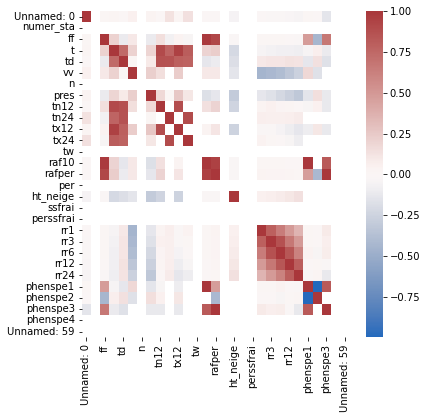

In [52]:
corr = df_synop.corr()
plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.heatmap(corr,cmap="vlag")

## Feature Selection

In [12]:
mnemo = ['date','numer_sta','pmer','dd','ff','t','u','n','rr24','ssfrai']
mnemo1 = ['date','numer_sta','dd','ff','t','u','n','rr24','ssfrai'] #manque pression niveau de la mer (pmer)

In [19]:
ratio_nivo = pd.Series(ratio_nivo,name='nivo')
ratio_synop = pd.Series(ratio_synop,name='synop')

In [20]:
ratio_comp = pd.concat([ratio_nivo, ratio_synop],axis=1)

In [ ]:
ratio_comp.dropna().T[mnemo1].T

,nivo,synop
date,0.0,0.000000
numer_sta,0.0,0.000000
dd,0.0,0.000000
ff,0.0,0.011038
t,0.0,0.003903
u,0.0,0.000000
n,0.0,0.489335
rr24,0.0,0.435342
ssfrai,0.0,0.836341


In [47]:
df_synop

,Unnamed: 0,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
30,30,7591,2018-07-01 00:00:00,nan,60,2,0,0.0,292.45,284.45,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
84,84,7591,2018-07-01 03:00:00,nan,-10,0,20,3.4,291.35,283.45,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
138,138,7591,2018-07-01 06:00:00,nan,70,0,40,3.1,291.85,284.45,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
192,192,7591,2018-07-01 09:00:00,nan,-60,5,240,2.2,298.65,285.45,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
246,246,7591,2018-07-01 12:00:00,nan,-170,8,210,4.6,304.55,283.85,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948663,14375,7591,2021-07-31 09:00:00,nan,90,8,80,2.2,297.05,285.95,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
1948721,14433,7591,2021-07-31 12:00:00,nan,120,6,190,2.7,298.05,287.55,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
1948780,14492,7591,2021-07-31 15:00:00,nan,80,6,240,3.9,293.85,287.45,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
1948838,14550,7591,2021-07-31 18:00:00,nan,50,5,330,3.2,288.95,287.45,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN


In [48]:
df_synop[mnemo1].loc[df_synop.numer_sta == 7481.0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       0 non-null      datetime64[ns]
 1   numer_sta  0 non-null      int64         
 2   dd         0 non-null      object        
 3   ff         0 non-null      float64       
 4   t          0 non-null      float64       
 5   u          0 non-null      object        
 6   n          0 non-null      float64       
 7   rr24       0 non-null      float64       
 8   ssfrai     0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 0.0+ bytes


In [50]:
#1 = Indicatif OMM station
#2 = Direction du vent moyen 10 mn (degré)
#3 = Vitesse du vent moyen 10 mn (m/s)
#4 = Température (K)
#5 = Humidité (%)
#6 = Nebulosité totale (%)
#7 = Précipitations dans les 24 dernières heures (mm)
#8 = Hauteur de la neige fraîche (m)